# Test with sentence_transformer


# Imports

In [1]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
import os
import pickle

# Read Data Files


In [11]:
project_base_path = os.path.dirname(os.path.dirname(os.getcwd()))
project_base_path

'/media/ANONYMOUS/4TB_1/Projects/FALCON'

In [12]:
gpt4o_generated_cti_path = os.path.join(
    project_base_path, "data/generation/snort/snort3-community-rules_v1.pkl"
)
gpt4o_generated_cti_path

'/media/ANONYMOUS/4TB_1/Projects/FALCON/data/generation/snort/snort3-community-rules_v1.pkl'

In [13]:
def load_from_pickle(file_path):
    """
    Loads data from a pickle file.

    :param file_path: Path to the pickle file
    :return: Loaded data
    """
    try:
        with open(file_path, "rb") as file:
            return pickle.load(file)
    except Exception as e:
        print(f"Error loading data from pickle: {e}")
        return None

In [14]:
# Load the data back from the pickle file
file_path = gpt4o_generated_cti_path

gpt_snort_cti_dict = load_from_pickle(file_path)
size = len(gpt_snort_cti_dict.keys())
print(size)

4017


In [15]:
def get_first_n_elements(dictionary: dict, n: int) -> dict:
    """
    Get the first n elements of a dictionary.

    :param dictionary: The input dictionary
    :param n: The number of elements to retrieve
    :return: A dictionary with the first n elements
    """
    return dict(list(dictionary.items())[:n])

In [16]:
snort_cti_sample_dict = get_first_n_elements(gpt_snort_cti_dict, 10)

In [17]:
snort_cti_sample_dict

{'alert tcp $HOME_NET 2589 -> $EXTERNAL_NET any ( msg:"MALWARE-BACKDOOR - Dagger_1.4.0"; flow:to_client,established; content:"2|00 00 00 06 00 00 00|Drives|24 00|",depth 16; metadata:ruleset community; classtype:misc-activity; sid:105; rev:14; )': '    Title: Detection of Dagger 1.4.0 Backdoor Activity Over TCP\n\n    Threat Category: Malware – Backdoor\n\n    Threat Name: Dagger 1.4.0\n\n    Detection Summary:\n\n    This signature is designed to detect network traffic associated with the Dagger 1.4.0 backdoor. The traffic is characterized by a specific sequence of bytes ("2|00 00 00 06 00 00 00|Drives|24 00|") found within the first 16 bytes of the data payload. This communication occurs from an infected internal host to an external destination and typically indicates unauthorized remote access capabilities.\n\n    Rule Metadata\n    Classification: Misc Activity\n\n    Ruleset: Community\n\n    Rule Logic Breakdown\n    Alert Type: alert\n\n    Protocol: tcp\n\n    Source IP: $HOME_

In [18]:
snorts, ctis = zip(*snort_cti_sample_dict.items())
snorts = list(snorts)
ctis = list(ctis)

In [19]:
len(snorts), len(ctis)

(10, 10)

# Environment Setup


### sentence-transformers/all-MiniLM-L6-v2

In [ ]:
# Load SBERT model
model = SentenceTransformer("/media/ANONYMOUS/4TB_1/LLM_models/sentence-transformers/all-MiniLM-L6-v2")

# Step 1: Encode descriptions and rules
desc_embeddings = model.encode(ctis, convert_to_tensor=True)  # [num_desc x 384]
rule_embeddings = model.encode(snorts, convert_to_tensor=True)  # [num_rules x 384]

### sentence-transformers/all-mpnet-base-v2

In [ ]:
# Load SBERT model
model = SentenceTransformer('/media/ANONYMOUS/4TB_1/LLM_models/sentence-transformers/all-mpnet-base-v2')

# Step 1: Encode descriptions and rules
desc_embeddings = model.encode(ctis, convert_to_tensor=True)  # [num_desc x 768]
rule_embeddings = model.encode(snorts, convert_to_tensor=True)        # [num_rules x 768]

### intfloat/e5-base-v2

In [ ]:
# Load SBERT model
model = SentenceTransformer('/media/ANONYMOUS/4TB_1/LLM_models/intfloat/e5-base-v2')

# Step 1: Encode descriptions and rules
desc_embeddings = model.encode(ctis, convert_to_tensor=True)  # [num_desc x 768]
rule_embeddings = model.encode(snorts, convert_to_tensor=True)        # [num_rules x 768]

# Embedding Test


In [21]:
desc_embeddings.shape

torch.Size([10, 768])

In [22]:
rule_embeddings.shape

torch.Size([10, 768])

In [23]:
# Step 2: Compute dot product matrix [num_desc x num_rules]
dot_product_matrix = torch.matmul(desc_embeddings, rule_embeddings.T)

# Step 3: Apply softmax along rules axis (dim=1), to get attention weights from each description to all rules
attention_weights = F.softmax(dot_product_matrix, dim=1).cpu().numpy()

# Plot Attention

### sentence-transformers/all-MiniLM-L6-v2

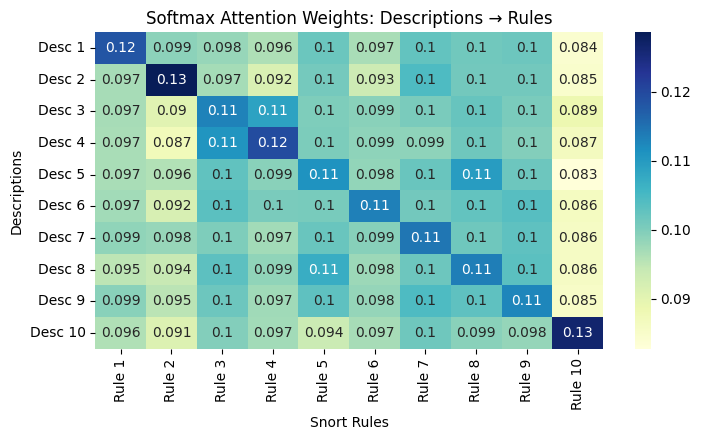

In [15]:
# Step 4: Plot attention heatmap
plt.figure(figsize=(7.5, 4.5))
sns.heatmap(attention_weights, annot=True, cmap="YlGnBu", 
            xticklabels=[f"Rule {i+1}" for i in range(len(snorts))], 
            yticklabels=[f"Desc {i+1}" for i in range(len(ctis))])
plt.title("Softmax Attention Weights: Descriptions → Rules")
plt.xlabel("Snort Rules")
plt.ylabel("Descriptions")
plt.tight_layout()
plt.show()

### sentence-transformers/all-mpnet-base-v2

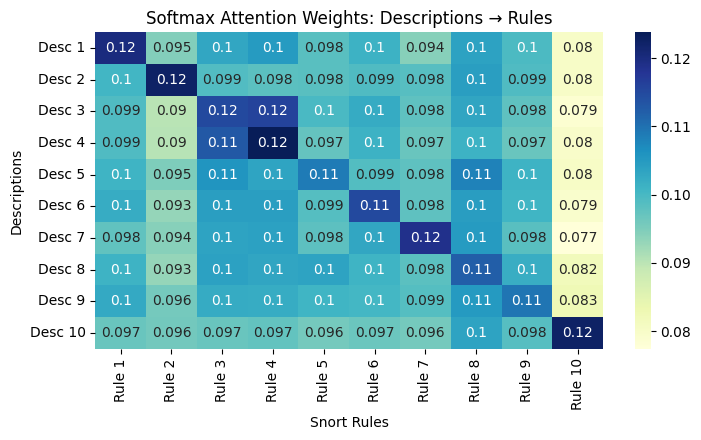

In [16]:
# Step 4: Plot attention heatmap
plt.figure(figsize=(7.5, 4.5))
sns.heatmap(attention_weights, annot=True, cmap="YlGnBu", 
            xticklabels=[f"Rule {i+1}" for i in range(len(snorts))], 
            yticklabels=[f"Desc {i+1}" for i in range(len(ctis))])
plt.title("Softmax Attention Weights: Descriptions → Rules")
plt.xlabel("Snort Rules")
plt.ylabel("Descriptions")
plt.tight_layout()
plt.show()

### intfloat/e5-base-v2

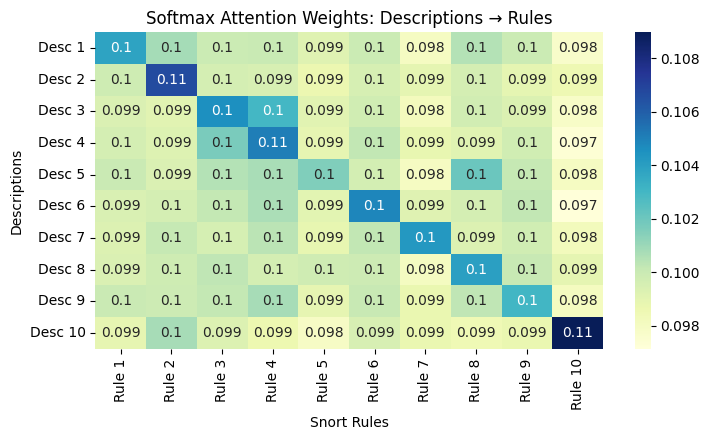

In [24]:
# Step 4: Plot attention heatmap
plt.figure(figsize=(7.5, 4.5))
sns.heatmap(attention_weights, annot=True, cmap="YlGnBu", 
            xticklabels=[f"Rule {i+1}" for i in range(len(snorts))], 
            yticklabels=[f"Desc {i+1}" for i in range(len(ctis))])
plt.title("Softmax Attention Weights: Descriptions → Rules")
plt.xlabel("Snort Rules")
plt.ylabel("Descriptions")
plt.tight_layout()
plt.show()